# 숙소별 클러스터링 작업

In [56]:
import pandas as pd
df=pd.read_csv('클러스터링용_프레임_파생변수포함.csv')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19404 entries, 0 to 19403
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   최초리뷰연도              19404 non-null  int64  
 1   최초리뷰월               19404 non-null  int64  
 2   숙소ID                19404 non-null  int64  
 3   숙소명                 19404 non-null  object 
 4   숙소유형코드              19404 non-null  int64  
 5   숙소운영형태              19404 non-null  object 
 6   상위 시도               19404 non-null  object 
 7   하위 시구               19404 non-null  object 
 8   위도                  19404 non-null  float64
 9   경도                  19404 non-null  float64
 10  체크인시간               19404 non-null  object 
 11  체크아웃시간              19404 non-null  object 
 12  숙소 검색량(전체)          19404 non-null  int64  
 13  지역별_유튜브Top20_평균조회수  19404 non-null  int64  
 14  주중판매가               19404 non-null  int64  
 15  주말판매가               19404 non-null  int64  
 16  판매가비

In [58]:
df

,최초리뷰연도,최초리뷰월,숙소ID,숙소명,숙소유형코드,숙소운영형태,상위 시도,하위 시구,위도,경도,...,주중판매가,주말판매가,판매가비율,리뷰수,별점,감성별점,종합평균점수,감성별점_평균,운영 기간(개월),운영시간(시간)
0,2017,11,23184,영등포라이프스타일FHOTEL,1,Motel,서울,영등포구,37.517182,126.911217,...,65000,110000,1.7,3202,4.7,3.1,3.9,3.100239,95,13.0
1,2017,12,23192,청주오창M+,1,Motel,충북,청주시,36.713884,127.439228,...,55000,50000,0.9,670,4.6,3.8,4.2,3.751613,94,18.0
2,2017,10,23197,강남렉시,1,Motel,서울,강남구,37.498792,127.033956,...,60000,120000,2.0,9275,4.2,2.9,3.5,2.858000,96,14.0
3,2017,12,23204,대전유성시나브로,1,Motel,대전,유성구,36.356873,127.349172,...,60000,90000,1.5,245,4.7,4.1,4.4,4.112426,94,20.0
4,2017,10,23207,역삼벤,1,Motel,서울,강남구,37.500706,127.039849,...,55000,125000,2.3,10124,4.8,3.0,3.9,2.979960,96,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19399,2021,6,1000114526,전주중노송동파인,1,Motel,전북,전주시,35.822097,127.150451,...,45000,60000,1.3,64,3.3,4.4,3.9,4.421875,51,20.0
19400,2021,10,1000114529,거창서핑파크리조트&글램핑,2,Hotel,경남,거창군,35.747967,127.836350,...,115000,140000,1.2,51,4.3,3.5,3.9,3.490196,47,20.0
19401,2021,6,1000114558,여수굿썸,1,Motel,전남,여수시,34.719781,127.750254,...,60000,80000,1.3,38,2.7,4.2,3.5,4.222222,51,20.0
19402,2021,10,1000114577,순천브라운도트순천역점,1,Motel,전남,순천시,34.944613,127.504991,...,70000,100000,1.4,456,4.9,4.2,4.6,4.228395,47,12.0


In [59]:
import pandas as pd
from datetime import datetime
import numpy as np

# Load the DataFrame
df = pd.read_csv("클러스터링용_프레임.csv")

# Calculate '운영 기간(개월)' (Accommodation Age in months)
current_date = datetime.now()
df['최초리뷰일자'] = pd.to_datetime(df['최초리뷰연도'].astype(str) + '-' + df['최초리뷰월'].astype(str) + '-01')
df['운영 기간(개월)'] = ((current_date - df['최초리뷰일자']).dt.days // 30).astype(int)

# Calculate '운영시간(시간)' (Operating Hours)
def calculate_operating_hours(check_in, check_out):
    try:
        start_time = datetime.strptime(check_in, '%H:%M')
        end_time = datetime.strptime(check_out, '%H:%M')
        
        # If check-out is on the next day (e.g., check-in 23:00, check-out 12:00)
        if end_time < start_time:
            end_time = end_time.replace(day=end_time.day + 1)
        
        duration = end_time - start_time
        return duration.total_seconds() / 3600
    except ValueError:
        return np.nan

df['운영시간(시간)'] = df.apply(lambda row: calculate_operating_hours(row['체크인시간'], row['체크아웃시간']), axis=1)

# Drop the temporary '최초리뷰일자' column
df = df.drop(columns=['최초리뷰일자'])

# Save the updated DataFrame to a new CSV file
df.to_csv("클러스터링용_프레임_파생변수포함.csv", index=False)

In [60]:
import pandas as pd
df = pd.read_csv("클러스터링용_프레임_파생변수포함.csv")

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19404 entries, 0 to 19403
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   최초리뷰연도              19404 non-null  int64  
 1   최초리뷰월               19404 non-null  int64  
 2   숙소ID                19404 non-null  int64  
 3   숙소명                 19404 non-null  object 
 4   숙소유형코드              19404 non-null  int64  
 5   숙소운영형태              19404 non-null  object 
 6   상위 시도               19404 non-null  object 
 7   하위 시구               19404 non-null  object 
 8   위도                  19404 non-null  float64
 9   경도                  19404 non-null  float64
 10  체크인시간               19404 non-null  object 
 11  체크아웃시간              19404 non-null  object 
 12  숙소 검색량(전체)          19404 non-null  int64  
 13  지역별_유튜브Top20_평균조회수  19404 non-null  int64  
 14  주중판매가               19404 non-null  int64  
 15  주말판매가               19404 non-null  int64  
 16  판매가비

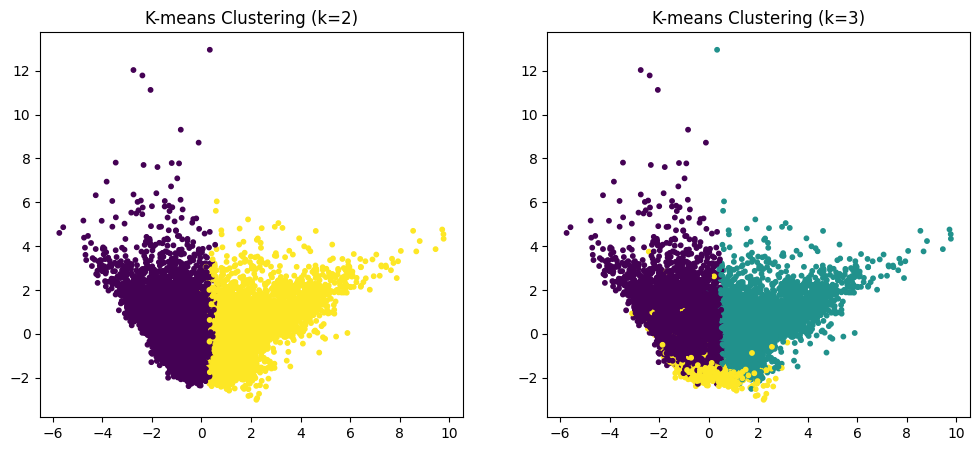

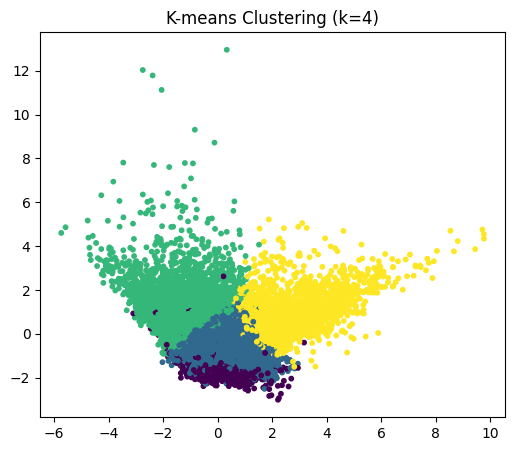

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ✅ 클러스터링에 활용할 수 있는 주요 피처 선택
features = [
     "주말판매가", "판매가비율",
    "리뷰수", "종합평균점수"
    , "지역별_유튜브Top20_평균조회수", "운영시간(시간)",'운영 기간(개월)'
]

X = df[features]

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans (2~4개 군집 시도)
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X_scaled)
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_scaled)
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10).fit(X_scaled)

# PCA로 2차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# 2군집
axes[0].scatter(X_pca[:,0], X_pca[:,1], c=kmeans_2.labels_, cmap="viridis", s=10)
axes[0].set_title("K-means Clustering (k=2)")

# 3군집
axes[1].scatter(X_pca[:,0], X_pca[:,1], c=kmeans_3.labels_, cmap="viridis", s=10)
axes[1].set_title("K-means Clustering (k=3)")

# 4군집
fig, ax = plt.subplots(figsize=(6, 5))
ax.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_4.labels_, cmap="viridis", s=10)
ax.set_title("K-means Clustering (k=4)")



plt.show()


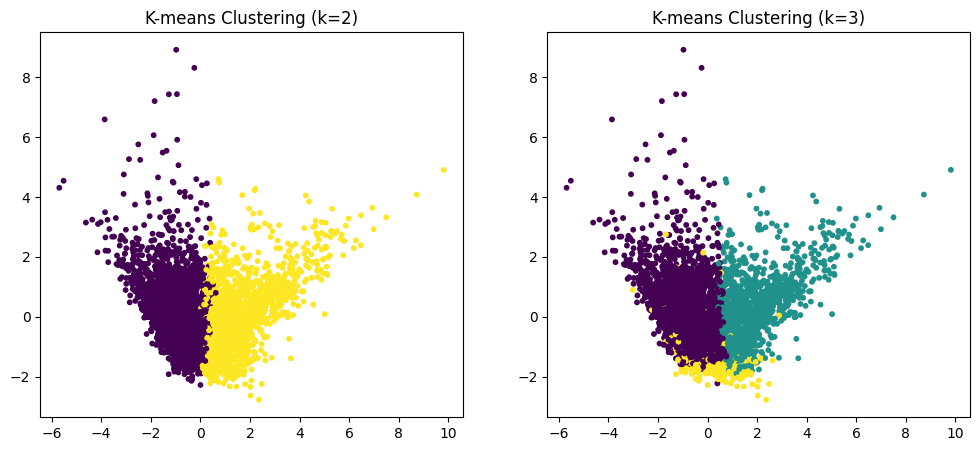

In [63]:
# 데이터가 많아서 PCA 및 클러스터링 계산이 오래 걸린 것 같음
# 샘플링 후 클러스터링 실행 (속도 개선)

# 데이터 샘플링 (5000개 정도)
df_sample = df.sample(n=5000, random_state=42)
X_sample = df_sample[features]

# 스케일링
scaler = StandardScaler()
X_scaled_sample = scaler.fit_transform(X_sample)

# KMeans
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X_scaled_sample)
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_scaled_sample)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_sample)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].scatter(X_pca[:,0], X_pca[:,1], c=kmeans_2.labels_, cmap="viridis", s=10)
axes[0].set_title("K-means Clustering (k=2)")

axes[1].scatter(X_pca[:,0], X_pca[:,1], c=kmeans_3.labels_, cmap="viridis", s=10)
axes[1].set_title("K-means Clustering (k=3)")

plt.show()


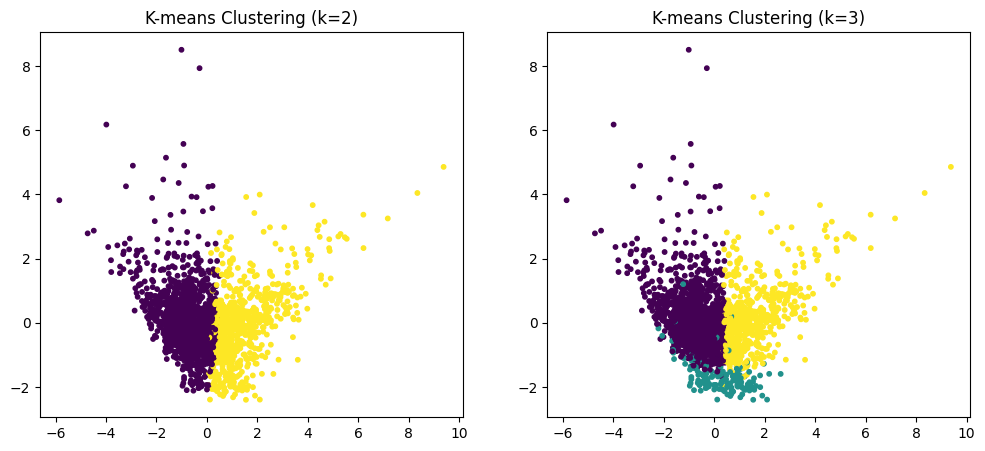

In [64]:
# 연산 속도 최적화: 더 작은 샘플링 (2000개)
df_sample = df.sample(n=2000, random_state=42)
X_sample = df_sample[features]

# 스케일링
scaler = StandardScaler()
X_scaled_sample = scaler.fit_transform(X_sample)

# KMeans
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X_scaled_sample)
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_scaled_sample)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_sample)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].scatter(X_pca[:,0], X_pca[:,1], c=kmeans_2.labels_, cmap="viridis", s=10)
axes[0].set_title("K-means Clustering (k=2)")

axes[1].scatter(X_pca[:,0], X_pca[:,1], c=kmeans_3.labels_, cmap="viridis", s=10)
axes[1].set_title("K-means Clustering (k=3)")

plt.show()


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19404 entries, 0 to 19403
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   최초리뷰연도              19404 non-null  int64  
 1   최초리뷰월               19404 non-null  int64  
 2   숙소ID                19404 non-null  int64  
 3   숙소명                 19404 non-null  object 
 4   숙소유형코드              19404 non-null  int64  
 5   숙소운영형태              19404 non-null  object 
 6   상위 시도               19404 non-null  object 
 7   하위 시구               19404 non-null  object 
 8   위도                  19404 non-null  float64
 9   경도                  19404 non-null  float64
 10  체크인시간               19404 non-null  object 
 11  체크아웃시간              19404 non-null  object 
 12  숙소 검색량(전체)          19404 non-null  int64  
 13  지역별_유튜브Top20_평균조회수  19404 non-null  int64  
 14  주중판매가               19404 non-null  int64  
 15  주말판매가               19404 non-null  int64  
 16  판매가비

## 로그로 변환

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


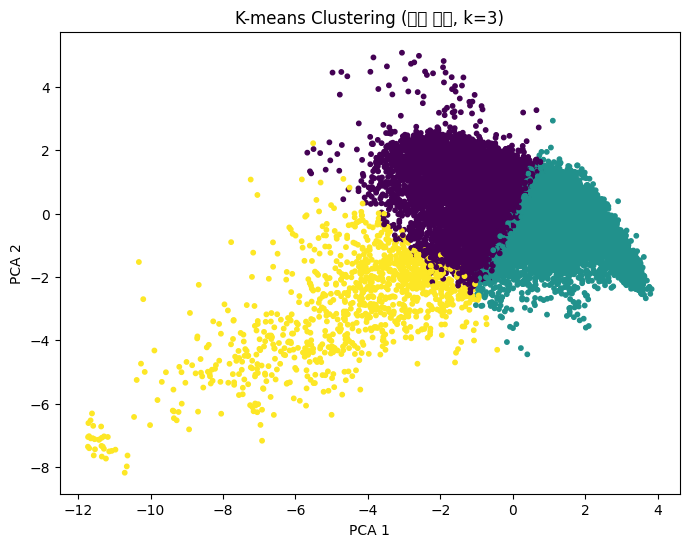

In [66]:
import numpy as np

# 로그 변환할 피처 리스트
log_features =[
     "주말판매가", "판매가비율",
    "리뷰수", "종합평균점수"
    , "지역별_유튜브Top20_평균조회수", "운영시간(시간)",'운영 기간(개월)'
]


# 0 이하 값이 있으면 1을 더해서 변환 (log(0) 방지)
for col in log_features:
    df[f"log_{col}"] = np.log1p(df[col])

# 로그 변환된 피처로 클러스터링
features_log = [f"log_{col}" for col in log_features] + ["별점", "감성별점_평균", "종합평균점수"]
X_log = df[features_log]

# 스케일링
scaler = StandardScaler()
X_log_scaled = scaler.fit_transform(X_log)

# K-means 클러스터링 (예: k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_log_scaled)

# PCA 시각화
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_log_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis", s=10)
plt.title("K-means Clustering (로그 변환, k=3)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# 결과를 원본 데이터에 병합
df["cluster_log"] = labels

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19404 entries, 0 to 19403
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   최초리뷰연도                  19404 non-null  int64  
 1   최초리뷰월                   19404 non-null  int64  
 2   숙소ID                    19404 non-null  int64  
 3   숙소명                     19404 non-null  object 
 4   숙소유형코드                  19404 non-null  int64  
 5   숙소운영형태                  19404 non-null  object 
 6   상위 시도                   19404 non-null  object 
 7   하위 시구                   19404 non-null  object 
 8   위도                      19404 non-null  float64
 9   경도                      19404 non-null  float64
 10  체크인시간                   19404 non-null  object 
 11  체크아웃시간                  19404 non-null  object 
 12  숙소 검색량(전체)              19404 non-null  int64  
 13  지역별_유튜브Top20_평균조회수      19404 non-null  int64  
 14  주중판매가                   19404 non-null

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


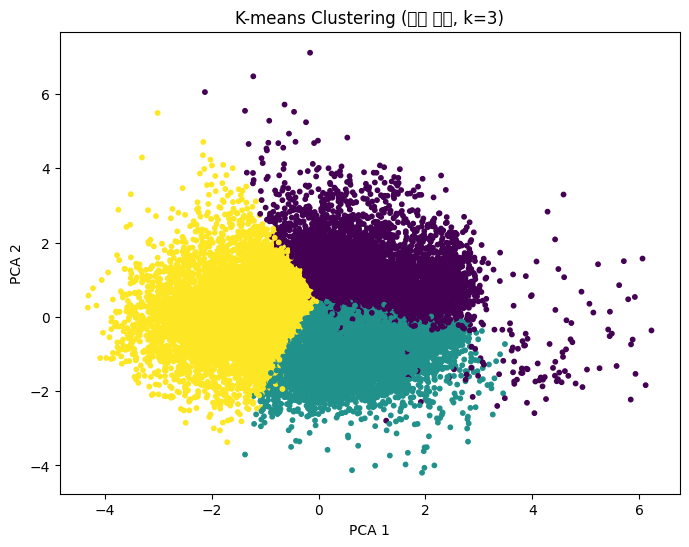

In [68]:
import numpy as np

features = [
    "주말판매가", "판매가비율",
    "리뷰수", "종합평균점수",
    "지역별_유튜브Top20_평균조회수", "운영시간(시간)", "운영 기간(개월)"
]

# 0 이하 값이 있으면 1을 더해서 변환 (log(0) 방지)
for col in features:
    df[f"log_{col}"] = np.log1p(df[col])

features_log = [f"log_{col}" for col in features]
X_log = df[features_log]

# 스케일링
scaler = StandardScaler()
X_log_scaled = scaler.fit_transform(X_log)

# K-means 클러스터링 (예: k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_log_scaled)

# PCA 시각화
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_log_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis", s=10)
plt.title("K-means Clustering (로그 변환, k=3)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

df["cluster_log"] = labels

## 실루엣 스코어
- 실루엣 스코어는 군집수를 결정하는데 자주 사용됩니다.
  * 군집수 3,4,5 로 진행 후 각 스코어 확인후 결정.
  
- 각 군집의 품질을 정량적으로 평가
- 시각화 -> 실루엣플롯을 사용해 군집의 응집도와 분리도 를 직관적으로 파악 가능
- 음수: 잘못된 군집할당.
- 1에 가까울수록 높은 퀄리티의 군집화를 의미
- 높은 퀄리티: 군집 내 데이터간 거리가 짧고, 다른 군집과는 충분히 떨어진 상태.

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# 피쳐설정 및 스케일링
X_features = df[["주말판매가", "판매가비율",
    "리뷰수", "종합평균점수",
    "지역별_유튜브Top20_평균조회수", "운영시간(시간)", "운영 기간(개월)"]].values
X_features_scaled = StandardScaler().fit_transform(X_features)

# Kmean알고리즘 설정 및 예측
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)

# 결과 label추가
df['cluster_label'] = labels

# 실루엣스코어 계산
silhouette_score(X_features_scaled, labels)

0.1778145622774818

군집을 3개로 구성할 경우
- 계수 0.575
- 각 군집별 실루엣계수도 확인
- 군집개수를 2~5 개로 변경시키면서 실루엣계수와 시각화 진행.

### 관련함수

1. 첫번째 함수는 실루엣계수를 면적으로 시각화 표현한 함수
2. 두번째 함수는 산점도로 클러스터링 시각화

In [70]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists) # [2,3,4]

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [71]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화
def visualize_kmeans_plot_multi(cluster_lists, X_features):

    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])

     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels

        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']

        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))
        axs[ind].legend(loc='upper right')

    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_2224\3946551466.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
C:\Users\user\AppData\Local\Temp\ipykernel_2224\3946551466.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


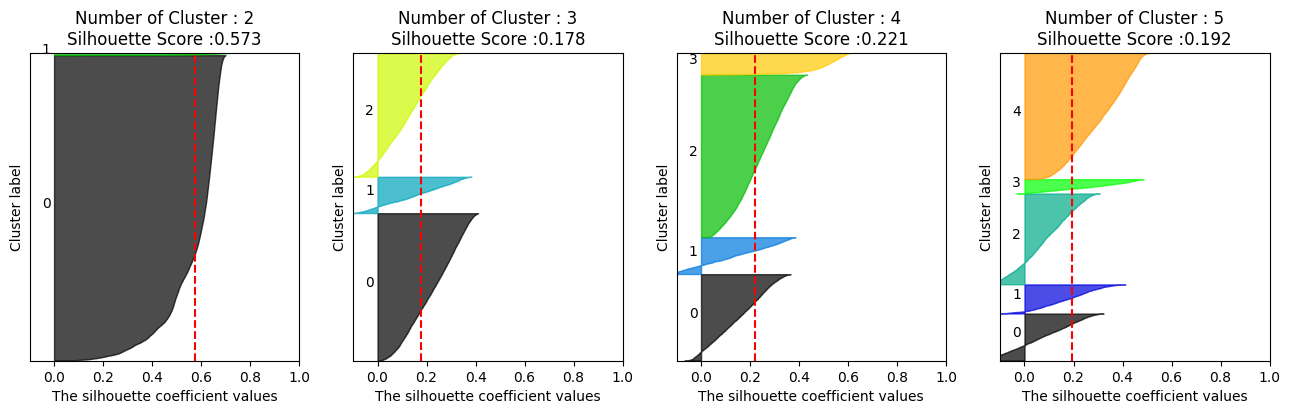

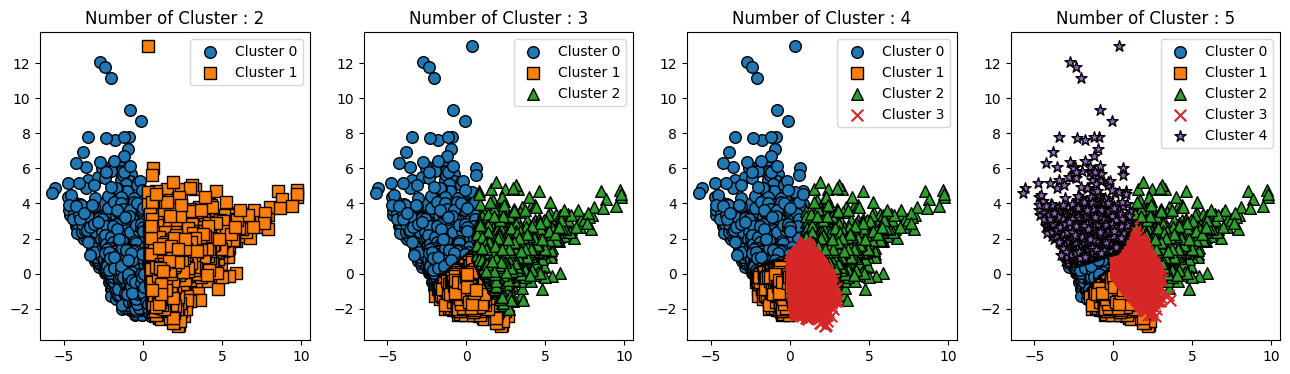

In [72]:
#함수 호출
visualize_silhouette([2,3,4,5], X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5], X_features_scaled)

# 로그로 변환했을 때


In [74]:
df.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19404 entries, 0 to 19403
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   최초리뷰연도                  19404 non-null  int64  
 1   최초리뷰월                   19404 non-null  int64  
 2   숙소ID                    19404 non-null  int64  
 3   숙소명                     19404 non-null  object 
 4   숙소유형코드                  19404 non-null  int64  
 5   숙소운영형태                  19404 non-null  object 
 6   상위 시도                   19404 non-null  object 
 7   하위 시구                   19404 non-null  object 
 8   위도                      19404 non-null  float64
 9   경도                      19404 non-null  float64
 10  체크인시간                   19404 non-null  object 
 11  체크아웃시간                  19404 non-null  object 
 12  숙소 검색량(전체)              19404 non-null  int64  
 13  지역별_유튜브Top20_평균조회수      19404 non-null  int64  
 14  주중판매가                   19404 non-null

In [75]:
### Log 변환을 통해 데이터 변환


# Log Transformation 데이터에 StandardScaler 적용
X_features = df[['log_주말판매가', 'log_판매가비율', 'log_리뷰수', 'log_종합평균점수','log_지역별_유튜브Top20_평균조회수','log_운영시간(시간)','log_운영 기간(개월)']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

# Kmean알고리즘 설정 및 예측
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)

# 결과 label추가
df['cluster_label'] = labels

# 실루엣스코어 계산
silhouette_score(X_features_scaled, labels)

0.17531301490797346

C:\Users\user\AppData\Local\Temp\ipykernel_2224\3946551466.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
C:\Users\user\AppData\Local\Temp\ipykernel_2224\3946551466.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


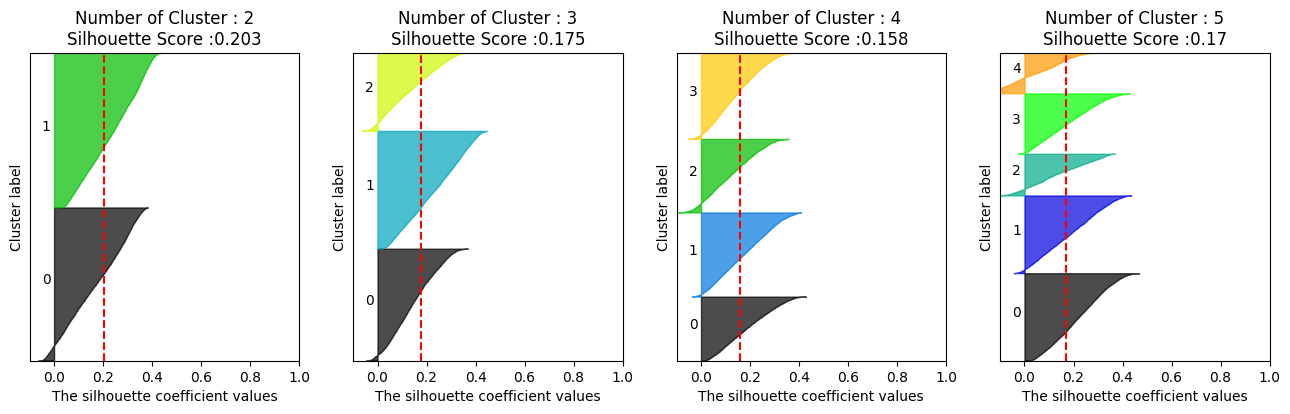

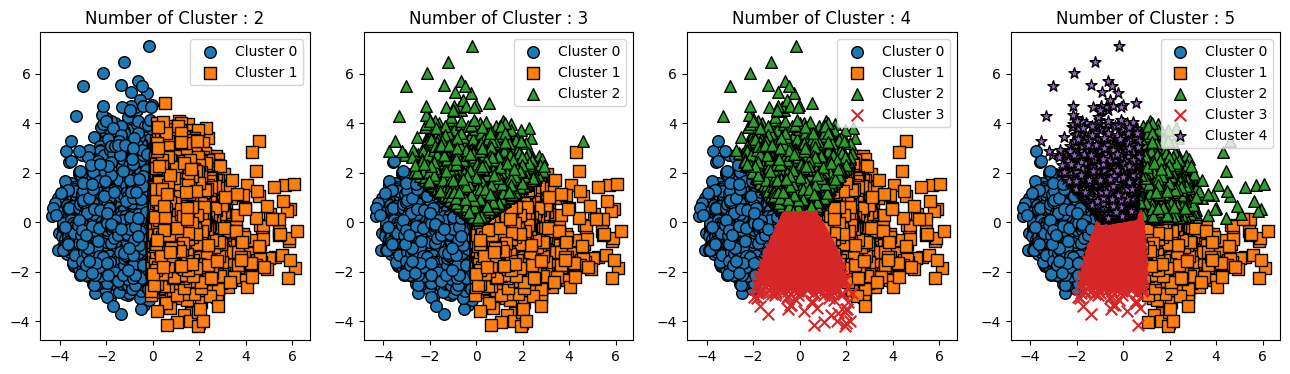

In [76]:
visualize_silhouette([2,3,4,5], X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5], X_features_scaled)

### 실루엣 vs 로그변환후 군집정도
- 실루엣계수는 로그화 전보다 낮지만 개별군집이 균일하다.
- 계수의 절대치보다는 개별군집의 균일성에 초점을 두고 분석.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19404 entries, 0 to 19403
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   최초리뷰연도                  19404 non-null  int64  
 1   최초리뷰월                   19404 non-null  int64  
 2   숙소ID                    19404 non-null  int64  
 3   숙소명                     19404 non-null  object 
 4   숙소유형코드                  19404 non-null  int64  
 5   숙소운영형태                  19404 non-null  object 
 6   상위 시도                   19404 non-null  object 
 7   하위 시구                   19404 non-null  object 
 8   위도                      19404 non-null  float64
 9   경도                      19404 non-null  float64
 10  체크인시간                   19404 non-null  object 
 11  체크아웃시간                  19404 non-null  object 
 12  숙소 검색량(전체)              19404 non-null  int64  
 13  지역별_유튜브Top20_평균조회수      19404 non-null  int64  
 14  주중판매가                   19404 non-null

In [82]:
# 모든 열 확인
pd.set_option('display.max_columns', None)

In [84]:
# 군집별 주요 기술통계 확인
cluster_summary = df.groupby('cluster_label').agg({
    '주말판매가': ['mean', 'median'],
    '판매가비율': ['mean', 'median'],
    '리뷰수': ['mean', 'median'],
    '종합평균점수': ['mean', 'median'],
    '지역별_유튜브Top20_평균조회수': ['mean', 'median'],
    '운영시간(시간)': ['mean', 'median'],
    '운영 기간(개월)': ['mean', 'median'],
    'log_주말판매가': ['mean', 'median'],
    'log_판매가비율': ['mean', 'median'],
    'log_리뷰수': ['mean', 'median'],
    'log_종합평균점수': ['mean', 'median'],
    'log_지역별_유튜브Top20_평균조회수': ['mean', 'median'],
    'log_운영시간(시간)': ['mean', 'median'],
    'log_운영 기간(개월)': ['mean', 'median']
})


# 그룹별 고객 수
cluster_counts = df['cluster_label'].value_counts().rename('Accomodation Count')

# 결과 정리
cluster_summary = cluster_summary.reset_index()
cluster_summary = pd.concat([cluster_summary, cluster_counts], axis=1)

# 출력
cluster_summary.to_csv("클러스터링_결과_요약.csv", index=False)

In [86]:
cluster_summary

,"(cluster_label, )","(주말판매가, mean)","(주말판매가, median)","(판매가비율, mean)","(판매가비율, median)","(리뷰수, mean)","(리뷰수, median)","(종합평균점수, mean)","(종합평균점수, median)","(지역별_유튜브Top20_평균조회수, mean)","(지역별_유튜브Top20_평균조회수, median)","(운영시간(시간), mean)","(운영시간(시간), median)","(운영 기간(개월), mean)","(운영 기간(개월), median)","(log_주말판매가, mean)","(log_주말판매가, median)","(log_판매가비율, mean)","(log_판매가비율, median)","(log_리뷰수, mean)","(log_리뷰수, median)","(log_종합평균점수, mean)","(log_종합평균점수, median)","(log_지역별_유튜브Top20_평균조회수, mean)","(log_지역별_유튜브Top20_평균조회수, median)","(log_운영시간(시간), mean)","(log_운영시간(시간), median)","(log_운영 기간(개월), mean)","(log_운영 기간(개월), median)",Accomodation Count
0,0,80270.036240,65000.0,1.211212,1.2,412.310447,135.0,4.164128,4.3,363742.810306,239400.0,19.353860,20.0,51.092299,49.0,11.167113,11.082158,0.787817,0.788457,4.851309,4.912655,1.633687,1.667707,12.319735,12.385895,3.008824,3.044522,3.735307,3.912023,7064
1,1,284882.281040,220000.0,1.672138,1.6,36.020873,14.0,4.683410,4.8,348276.238352,246000.0,19.919248,20.0,25.876246,21.0,12.359180,12.301387,0.960452,0.955511,2.779941,2.708050,1.735592,1.757858,12.407278,12.413091,3.039392,3.044522,3.013602,3.091042,7426
2,2,151197.918396,120000.0,2.116687,2.0,1753.057387,880.0,4.198413,4.2,420849.950956,321600.0,17.136549,18.0,67.520961,73.0,11.754000,11.695255,1.112609,1.098612,6.693866,6.781058,1.645736,1.648659,12.700143,12.681067,2.845976,2.944439,4.117896,4.304065,4914


# 군집별 주요 특징 (요약)
Cluster 0 (7064개 숙소)

평균 주말 판매가: 약 8만 원 (가장 저가형)

리뷰 수: 평균 412개 (중간 수준)

평균 평점: 4.16 (보통 수준)

유튜브 평균 조회수: 약 36만 (보통 수준)

운영 기간: 중간 정도

👉 저가형 실속 군집

합리적 가격, 리뷰가 적당히 쌓인 대중적 숙소군.

------ 

Cluster 1 (7426개 숙소)

평균 주말 판매가: 약 28만 원 (가장 고가)

리뷰 수: 평균 36개 (매우 적음)

평균 평점: 4.68 (가장 높음)

유튜브 평균 조회수: 약 34만 (보통 수준)

운영 기간: 짧음

👉 프리미엄 신규 숙소 군집

가격이 높고, 리뷰는 적지만 만족도가 높은 고급/신규 숙소군.

------

Cluster 2 (4914개 숙소)

평균 주말 판매가: 약 15만 원 (중간 가격대)

리뷰 수: 평균 1753개 (가장 많음)

평균 평점: 4.20 (보통 수준)

유튜브 평균 조회수: 약 42만 (가장 높음)

운영 기간: 가장 길음

👉 인기 베스트셀러 군집

대중적 가격대 + 리뷰 폭발적으로 많음 + 유튜브 인기도 높음 → 시장에서 가장 검증된 숙소군.

------

# 마케팅 방안 제안
Cluster 0 (저가형 실속 군집)

타겟: 가성비 찾는 20대·소규모 여행객

전략: 가격 할인, 번들 패키지 (교통+숙소), SNS 바이럴 중심

메시지: “가성비 최고의 선택, 리뷰로 검증된 실속 숙소”

------ 

Cluster 1 (프리미엄 신규 군집)

타겟: 고소득층, 커플, 가족 단위

전략: 고급스러운 브랜딩, 인플루언서 협찬, 프리미엄 프로모션

메시지: “새롭지만 완벽한 경험, 만족도 최고 프리미엄 숙소”

------

Cluster 2 (인기 베스트셀러 군집)

타겟: 대중 시장, 검증된 리뷰를 신뢰하는 고객

전략: 리뷰 기반 마케팅(“OO명이 선택한 숙소”), 유튜브 여행 크리에이터 협업, 시즌 이벤트

메시지: “수천 개 리뷰로 입증된 인기 숙소, 모두가 찾는 베스트셀러”

# 정리
Cluster 0 = 가성비 숙소 → 대중적 SNS 마케팅

Cluster 1 = 신규 프리미엄 → 고급 타겟팅/브랜딩

Cluster 2 = 인기 베스트셀러 → 리뷰·인플루언서 중심